In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
import plotly.express as px
import json

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans

# Load the processed data

In [3]:
manhattan = pd.read_csv('./data/processed/manhattan_04-20-2022.csv')
manhattan['borough'] = 'Manhattan'
manhattan['price/sqft'] = manhattan.rent/manhattan.sqft
manhattan.head()

,rent,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,laundry_facilities,roof,concierge,pool,elevator,...,latitude,longitude,dishwasher,dist_transit,dist_wall_street,dist_waterfront,pets_allowed,beds_times_baths,borough,price/sqft
0,2290.0,500.0,0,0,0,1,0,0,0,0,...,40.74761,-73.97421,0,0.228494,3.336871,0.004532,1,1.0,Manhattan,4.580000
1,2759.0,725.0,0,0,0,0,0,0,0,1,...,40.82500,-73.94862,0,0.124283,8.718798,0.006425,1,3.0,Manhattan,3.805517
2,4995.0,1000.0,0,0,0,1,0,0,0,0,...,40.75898,-73.96183,0,0.305744,4.352061,0.002771,1,3.0,Manhattan,4.995000
3,5550.0,983.0,1,1,0,1,0,0,0,1,...,40.79445,-73.96973,1,0.121224,6.354176,0.007658,1,4.0,Manhattan,5.645982
4,5700.0,983.0,1,1,0,1,0,0,0,1,...,40.79445,-73.96973,1,0.121224,6.354176,0.007658,1,4.0,Manhattan,5.798576


In [4]:
brooklyn = pd.read_csv('./data/processed/brooklyn_04-20-2022.csv')
brooklyn['borough'] = 'Brooklyn'
brooklyn['price/sqft'] = brooklyn.rent/brooklyn.sqft
brooklyn.head()

,rent,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,laundry_facilities,roof,concierge,pool,elevator,garage,latitude,longitude,dishwasher,dist_transit,dist_wall_street,pets_allowed,beds_times_baths,borough,price/sqft
0,4060.0,684.0,1,1,1,1,0,1,0,1,1,40.69273,-73.98605,1,0.026536,1.634417,1,1.0,Brooklyn,5.935673
1,3005.0,469.0,1,1,1,1,0,1,0,1,1,40.69273,-73.98605,1,0.026536,1.634417,1,0.0,Brooklyn,6.407249
2,5122.0,976.0,1,1,1,1,0,1,0,1,1,40.69273,-73.98605,1,0.026536,1.634417,1,4.0,Brooklyn,5.247951
3,4349.0,618.0,1,1,1,1,0,1,0,1,1,40.69273,-73.98605,1,0.026536,1.634417,1,1.0,Brooklyn,7.037217
4,3981.0,675.0,1,1,1,1,0,1,0,1,1,40.69273,-73.98605,1,0.026536,1.634417,1,1.0,Brooklyn,5.897778


In [5]:
# Join the boroughs
df = pd.concat([manhattan,brooklyn])
df.drop(columns={'dist_waterfront'},inplace=True)   # Drop for now
df.head()

,rent,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,laundry_facilities,roof,concierge,pool,elevator,garage,latitude,longitude,dishwasher,dist_transit,dist_wall_street,pets_allowed,beds_times_baths,borough,price/sqft
0,2290.0,500.0,0,0,0,1,0,0,0,0,0,40.74761,-73.97421,0,0.228494,3.336871,1,1.0,Manhattan,4.580000
1,2759.0,725.0,0,0,0,0,0,0,0,1,0,40.82500,-73.94862,0,0.124283,8.718798,1,3.0,Manhattan,3.805517
2,4995.0,1000.0,0,0,0,1,0,0,0,0,0,40.75898,-73.96183,0,0.305744,4.352061,1,3.0,Manhattan,4.995000
3,5550.0,983.0,1,1,0,1,0,0,0,1,1,40.79445,-73.96973,1,0.121224,6.354176,1,4.0,Manhattan,5.645982
4,5700.0,983.0,1,1,0,1,0,0,0,1,1,40.79445,-73.96973,1,0.121224,6.354176,1,4.0,Manhattan,5.798576


# Process the data for modeling

In [6]:
# Convert rent and sqft to log scale
df.rent=np.log(df.rent)
df.sqft=np.log(df.sqft)

In [7]:
# One hot encode the borough column
df['manhattan']=np.where(df.borough == 'Manhattan', 1, 0)
df['brooklyn']=np.where(df.borough == 'Brooklyn', 1, 0)
df.drop(columns={'borough'}, inplace=True)
df.head()

,rent,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,laundry_facilities,roof,concierge,pool,elevator,...,latitude,longitude,dishwasher,dist_transit,dist_wall_street,pets_allowed,beds_times_baths,price/sqft,manhattan,brooklyn
0,7.736307,6.214608,0,0,0,1,0,0,0,0,...,40.74761,-73.97421,0,0.228494,3.336871,1,1.0,4.580000,1,0
1,7.922624,6.586172,0,0,0,0,0,0,0,1,...,40.82500,-73.94862,0,0.124283,8.718798,1,3.0,3.805517,1,0
2,8.516193,6.907755,0,0,0,1,0,0,0,0,...,40.75898,-73.96183,0,0.305744,4.352061,1,3.0,4.995000,1,0
3,8.621553,6.890609,1,1,0,1,0,0,0,1,...,40.79445,-73.96973,1,0.121224,6.354176,1,4.0,5.645982,1,0
4,8.648221,6.890609,1,1,0,1,0,0,0,1,...,40.79445,-73.96973,1,0.121224,6.354176,1,4.0,5.798576,1,0


In [8]:
X = df.drop(['rent'], axis = 1)
y = df['rent']

In [9]:
# split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size = 0.2, random_state = 42)

# Cluster and Target Encodoe on train set

In [10]:
cluster_df = X_train.groupby(['latitude', 'longitude'], as_index=False)['price/sqft'].mean()
cluster_df.head()

,latitude,longitude,price/sqft
0,40.57558,-73.97332,2.818182
1,40.57564,-73.95886,3.000000
2,40.57568,-73.95881,2.760000
3,40.57639,-73.96152,2.166667
4,40.57730,-73.95841,2.916667


In [11]:
def clusters(clusters:int):
    # Find the optimal number of clusters to use
    lat_long = cluster_df.iloc[:,0:2]
    weights = cluster_df.iloc[:,2]

    # Set the parameters for KMeans
    kmeans_kwargs = {"init": "random",
                    "n_init": 10,
                    "max_iter": 1000,
                    "random_state": 42}

    
    kmeans = KMeans(n_clusters=clusters, **kmeans_kwargs)
    kmeans.fit(lat_long, sample_weight=weights)
    return kmeans

In [12]:
# Assign clusters to the training set
kmeans = clusters(55)
X_train['cluster_id'] = kmeans.predict(X_train[['latitude','longitude']])
X_train['cluster_id_encoded']=X_train.cluster_id.map(X_train.groupby('cluster_id')['price/sqft'].mean())
X_train.head()

,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,laundry_facilities,roof,concierge,pool,elevator,garage,...,dishwasher,dist_transit,dist_wall_street,pets_allowed,beds_times_baths,price/sqft,manhattan,brooklyn,cluster_id,cluster_id_encoded
429,7.003065,0,0,1,0,0,0,0,0,0,...,0,0.086741,2.979071,1,3.0,3.635455,0,1,19,5.331292
568,6.646391,1,0,0,0,0,0,0,0,0,...,0,0.175713,1.717233,1,1.0,5.785714,0,1,52,5.580864
495,6.410175,0,0,0,1,0,1,0,1,0,...,0,0.123133,3.103284,1,0.0,6.406250,1,0,23,6.151949
1176,6.684612,0,0,0,0,0,0,0,0,0,...,1,0.035790,4.204867,1,1.0,3.437500,1,0,39,6.181940
984,6.476972,0,0,0,0,0,0,0,0,0,...,0,0.196732,6.313020,0,2.0,2.615385,0,1,14,2.383997


In [13]:
# Visualize the clusters
fig = px.scatter_mapbox(X_train, lat="latitude", lon="longitude", color="cluster_id", mapbox_style="carto-positron", zoom=11.3)

fig.update_layout(height=1000, width=1000, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [14]:
# Get dictionary of clusters and their target encoded value
encoded_clusters = X_train.groupby('cluster_id')['cluster_id_encoded'].unique().astype(float).to_dict()

In [15]:
# Add the clusters and the encoded values to the test set
X_test['cluster_id'] = kmeans.predict(X_test[['latitude','longitude']])
X_test.loc[:,'cluster_id_encoded']=X_test.cluster_id.map(encoded_clusters)
X_test.head()


,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,laundry_facilities,roof,concierge,pool,elevator,garage,...,dishwasher,dist_transit,dist_wall_street,pets_allowed,beds_times_baths,price/sqft,manhattan,brooklyn,cluster_id,cluster_id_encoded
440,6.684612,0,1,1,0,0,0,0,0,1,...,1,0.043657,5.214109,1,2.0,3.343750,0,1,47,3.082789
1216,6.551080,0,0,0,0,0,0,0,1,0,...,1,0.160156,10.394026,0,2.0,3.857143,1,0,31,3.333842
100,7.003065,1,0,0,1,1,1,1,0,0,...,0,0.040642,4.279154,0,4.0,5.990909,1,0,39,6.181940
840,6.214608,0,0,0,1,0,0,0,0,0,...,0,0.307324,1.828220,1,1.0,4.600000,1,0,36,6.748516
251,5.926926,0,1,1,0,0,0,0,0,0,...,1,0.072703,6.497347,0,0.0,5.866667,1,0,43,5.507916


# Prepare the data

In [16]:
# Drop the unecessary columns
cols_drop = {'latitude', 'longitude', 'price/sqft', 'cluster_id'}
X_train.drop(columns={'latitude', 'longitude', 'price/sqft', 'cluster_id'}, inplace=True)
X_test.drop(columns={'latitude', 'longitude', 'price/sqft', 'cluster_id'}, inplace=True)

# 1. Base Model
Construct a linear regression model that only considers rent, number of bedrooms, and distance to wall street as the features. The result from this model will be our base model to compare against every other model that is built. 

In [17]:
# Fit the model 
def regression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Print results
    print('R squared training set', round(model.score(X_train, y_train)*100, 2))
    print('R squared test set', round(model.score(X_test, y_test)*100, 2))

    # Training data
    pred_train = model.predict(X_train)
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    mae_train = mean_absolute_error(np.exp(y_train), np.exp(pred_train))
    print('RMSE training set', round(mse_train, 2))
    print('MAE training set', round(mae_train, 2))

    # Test data
    pred_test = model.predict(X_test)
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    mae_test = mean_absolute_error(np.exp(y_test), np.exp(pred_test))
    print('RMSE test set', round(mse_test, 2))
    print('MAE test set', round(mae_test, 2))
    return model
    
X_base_train = np.array(X_train[['sqft', 'beds_times_baths', 'dist_wall_street']])
X_base_test = np.array(X_test[['sqft', 'beds_times_baths', 'dist_wall_street']])

In [18]:
model = regression(X_base_train, y_train, X_base_test, y_test)

R squared training set 38.63
R squared test set 41.35
RMSE training set 1350.47
MAE training set 1003.67
RMSE test set 1400.42
MAE test set 1043.64


# 2. Linear Regression

In [19]:
model = regression(X_train, y_train, X_test, y_test)

R squared training set 76.93
R squared test set 80.2
RMSE training set 822.59
MAE training set 552.4
RMSE test set 774.41
MAE test set 524.74


# 2a. Lasso Regression

In [20]:
def lasso_regression(X_train, y_train, X_test, y_test):
    lasso = Lasso(alpha=0.0001)
    lasso.fit(X_train, y_train)

    # Print results
    print('R squared training set', round(lasso.score(X_train, y_train)*100, 2))
    print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))

    # Training data
    pred_train = lasso.predict(X_train)
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    mae_train = mean_absolute_error(np.exp(y_train), np.exp(pred_train))
    print('RMSE training set', round(mse_train, 2))
    print('MAE training set', round(mae_train, 2))

    # Test data
    pred_test = lasso.predict(X_test)
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    mae_test = mean_absolute_error(np.exp(y_test), np.exp(pred_test))
    print('RMSE test set', round(mse_test, 2))
    print('MAE test set', round(mae_test, 2))
    return lasso

In [21]:
lasso = lasso_regression(X_train, y_train, X_test, y_test)

R squared training set 76.93
R squared test set 80.22
RMSE training set 822.67
MAE training set 552.24
RMSE test set 774.32
MAE test set 524.49


# 2b. Ridge Regression

In [22]:
def ridge_regression(X_train, y_train, X_test, y_test):
    ridge = Ridge(alpha=0.0001)
    ridge.fit(X_train, y_train)

    # Print results
    print('R squared training set', round(ridge.score(X_train, y_train)*100, 2))
    print('R squared test set', round(ridge.score(X_test, y_test)*100, 2))

    # Training data
    pred_train = ridge.predict(X_train)
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    mae_train = mean_absolute_error(np.exp(y_train), np.exp(pred_train))
    print('RMSE training set', round(mse_train, 2))
    print('MAE training set', round(mae_train, 2))

    # Test data
    pred_test = ridge.predict(X_test)
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    mae_test = mean_absolute_error(np.exp(y_test), np.exp(pred_test))
    print('RMSE test set', round(mse_test, 2))
    print('MAE test set', round(mae_test, 2))
    return ridge

In [23]:
ridge = ridge_regression(X_train, y_train, X_test, y_test)

R squared training set 76.93
R squared test set 80.2
RMSE training set 822.59
MAE training set 552.4
RMSE test set 774.41
MAE test set 524.74


# 3. XGBoost

In [24]:
def xgboost(X_train, y_train, X_test, y_test):
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)

    # Training data
    pred_train = xgb.predict(X_train)
    r2_train = r2_score(np.exp(y_train), np.exp(pred_train))
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    mae_train = mean_absolute_error(np.exp(y_train), np.exp(pred_train))

    # Test data
    pred_test = xgb.predict(X_test)
    r2_test = r2_score(np.exp(y_test), np.exp(pred_test))
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    mae_test = mean_absolute_error(np.exp(y_test), np.exp(pred_test))
    
    # Print results
    print('R squared training set', round(r2_train,2))
    print('R squared test set', round(r2_test,2))
    print('RMSE training set', round(mse_train, 2))
    print('MAE training set', round(mae_train, 2))
    print('RMSE test set', round(mse_test, 2))
    print('MAE test set', round(mae_test, 2))
    return xgb

xgb = xgboost(X_train, y_train, X_test, y_test)

R squared training set 0.99
R squared test set 0.88
RMSE training set 193.09
MAE training set 114.48
RMSE test set 620.0
MAE test set 392.04


# 4. Random Forest

In [25]:
def randomForest(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    # Training data
    pred_train = rf.predict(X_train)
    r2_train = r2_score(np.exp(y_train), np.exp(pred_train))
    mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))
    mae_train = mean_absolute_error(np.exp(y_train), np.exp(pred_train))

    # Test data
    pred_test = rf.predict(X_test)
    r2_test = r2_score(np.exp(y_test), np.exp(pred_test))
    mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))
    mae_test = mean_absolute_error(np.exp(y_test), np.exp(pred_test))
    
    # Print results
    print('R squared training set', round(r2_train,2))
    print('R squared test set', round(r2_test,2))
    print('RMSE training set', round(mse_train, 2))
    print('MAE training set', round(mae_train, 2))
    print('RMSE test set', round(mse_test, 2))
    print('MAE test set', round(mae_test, 2))
    return rf

rf = randomForest(X_train, y_train, X_test, y_test)

R squared training set 0.97
R squared test set 0.86
RMSE training set 278.41
MAE training set 164.0
RMSE test set 662.51
MAE test set 411.01


# 5. Comparing the models

In [26]:
results = {'Actual': np.exp(y_test),
           'LinReg': np.exp(model.predict(X_test)),
           'Lasso': np.exp(lasso.predict(X_test)),
           'XGB': np.exp(xgb.predict(X_test)),
           'RF': np.exp(rf.predict(X_test))}

results_df = pd.DataFrame.from_dict(results)
results_df.head(10)

,Actual,LinReg,Lasso,XGB,RF
440,2675.0,2609.758461,2609.032686,2382.064941,2517.203293
1216,2700.0,2143.057894,2143.000835,2577.700195,2252.998141
100,6590.0,5779.788800,5778.475194,6849.475098,6676.872359
840,2300.0,3175.754896,3178.269094,3052.752686,3229.559985
251,2200.0,2348.906235,2349.422742,2713.837158,2912.223625
925,3791.0,3753.114280,3755.434650,3717.306396,3644.011803
297,7223.0,6030.263172,6029.152135,7185.687988,7213.193955
564,6766.0,8855.274299,8840.957505,7940.212402,8040.733027
179,5995.0,5350.718019,5344.208261,5538.654297,5279.807491
371,3499.0,3083.198109,3082.396040,3515.228271,2960.899258


<Figure size 720x1080 with 0 Axes>

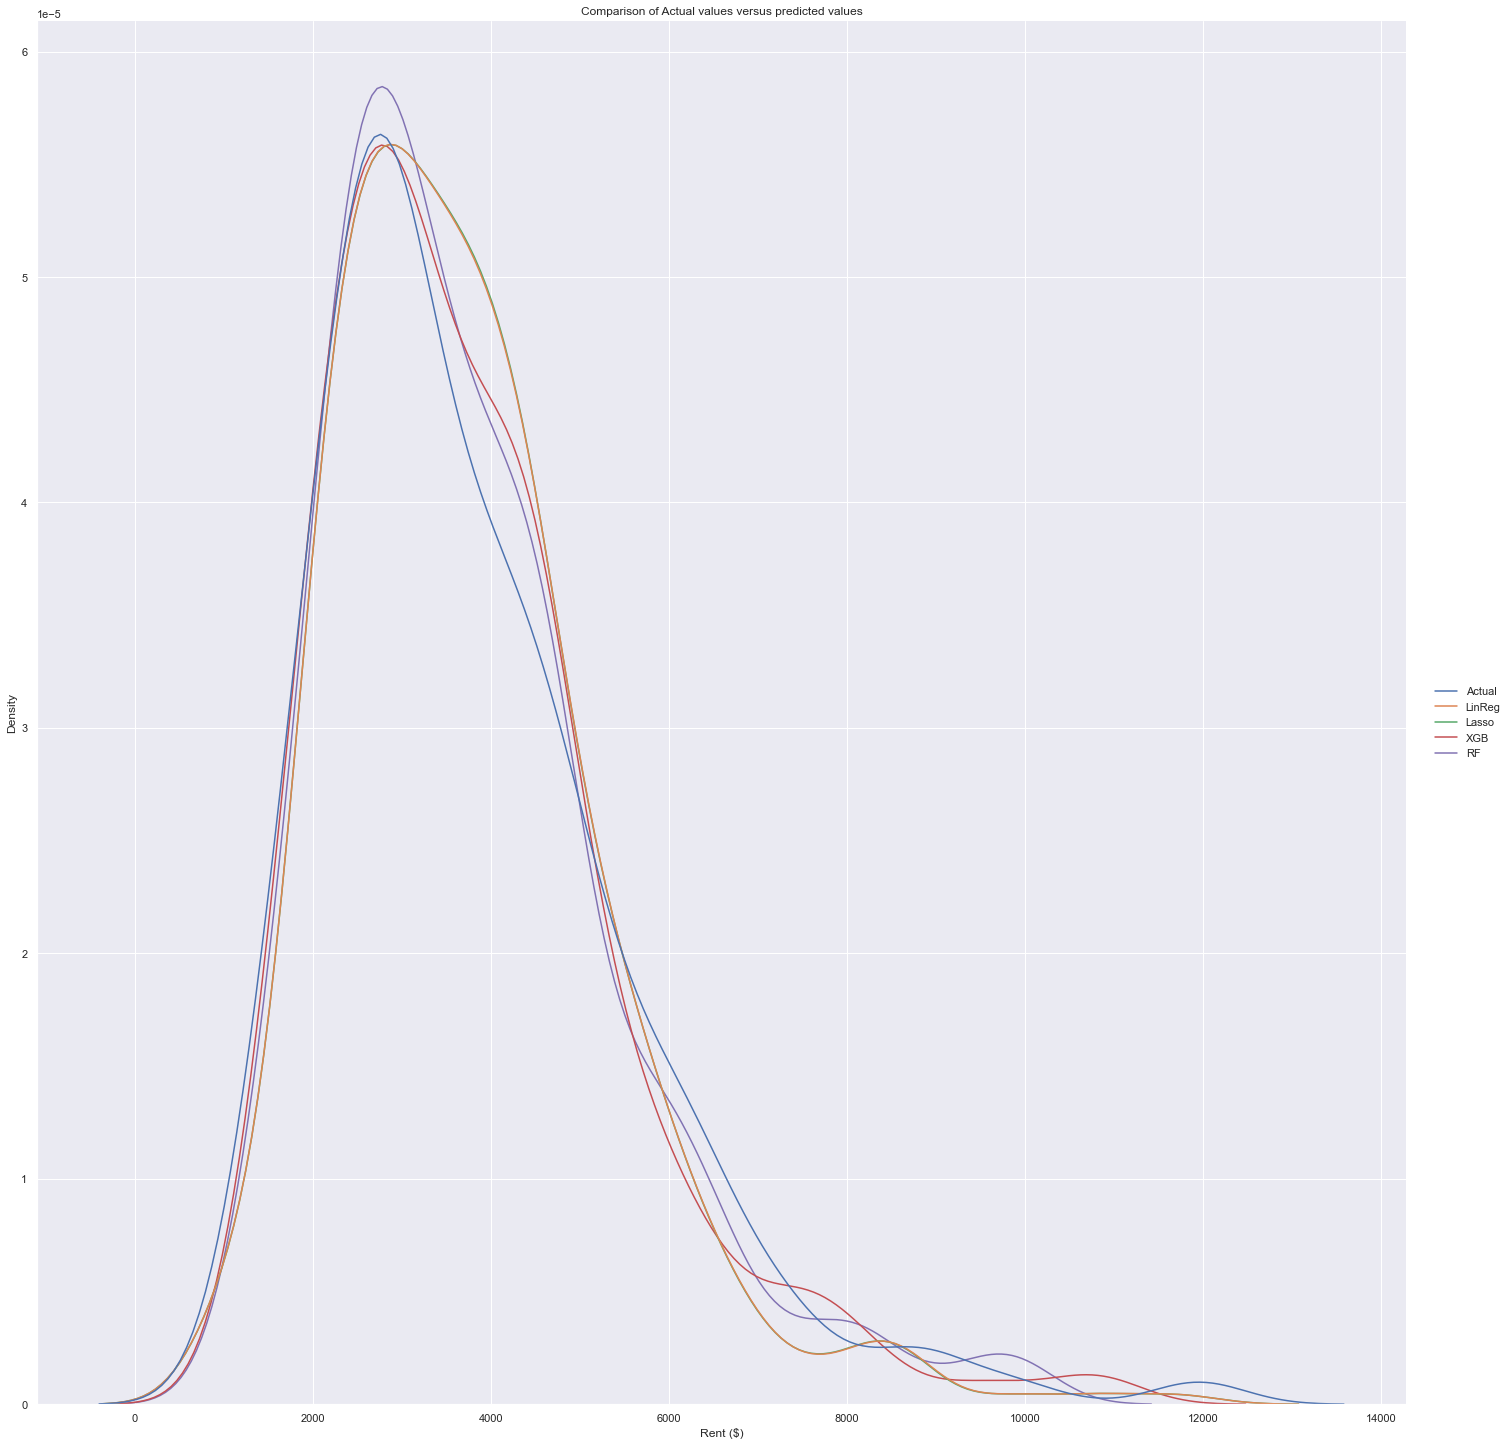

In [27]:
# Plot the results on a distribution 
plt.figure(figsize = (10,15))

ax = sns.displot(data = results_df, kind='kde', height = 20)
plt.title('Comparison of Actual values versus predicted values')
plt.xlabel('Rent ($)')
plt.show()

Both the XGB and Rand Forest models appear to be very similar. This was too be expected as this problem is well suited to tree based models. XGBoost has a slight edge in overall peformance so we will look at tuning the hyperparameters next. Focus will need to be placed on generalizing the model performance as it's definitely overfitting the data currently.

### Actual versus Predicted

/var/folders/1v/2xtr296s1rz_4kd_c4kx7qh00000gn/T/ipykernel_24549/4062441232.py:8: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.



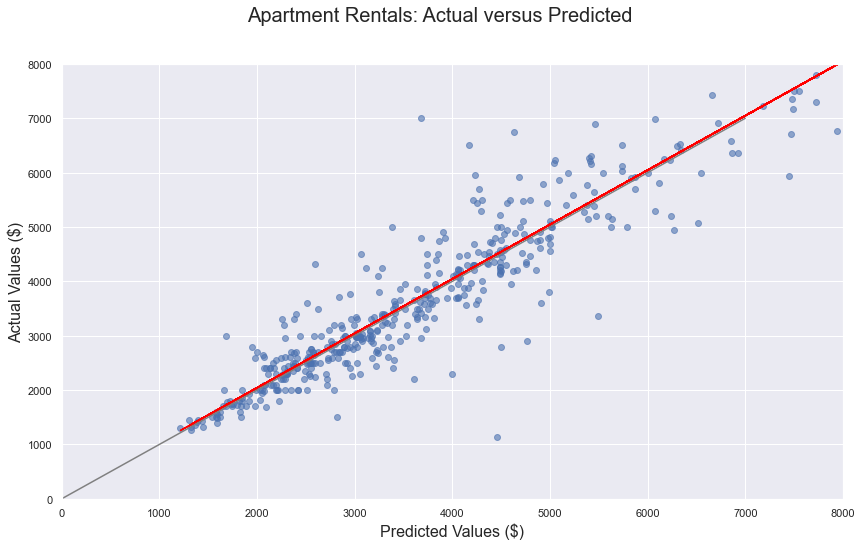

In [28]:
import matplotlib.pylab as plb 

plt.figure(figsize=(14, 8))
plt.scatter(np.exp(xgb.predict(X_test)), np.exp(y_test), alpha=.6) 

z = np.polyfit(np.exp(xgb.predict(X_test)), np.exp(y_test), 1)
p = np.poly1d(z)
plb.plot(np.exp(xgb.predict(X_test)), p(np.exp(xgb.predict(X_test))), 'm-', color='red')
plt.plot(np.linspace(0,7000,1000), np.linspace(0,7000,1000), color='grey')

plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.suptitle('Apartment Rentals: Actual versus Predicted', fontsize=20, fontname='Arial')
plt.xlabel('Predicted Values ($)', fontsize=16, fontname='Arial')
plt.ylabel('Actual Values ($)', fontsize=16, fontname='Arial');

Text(0, 0.5, 'Residuals ($)')

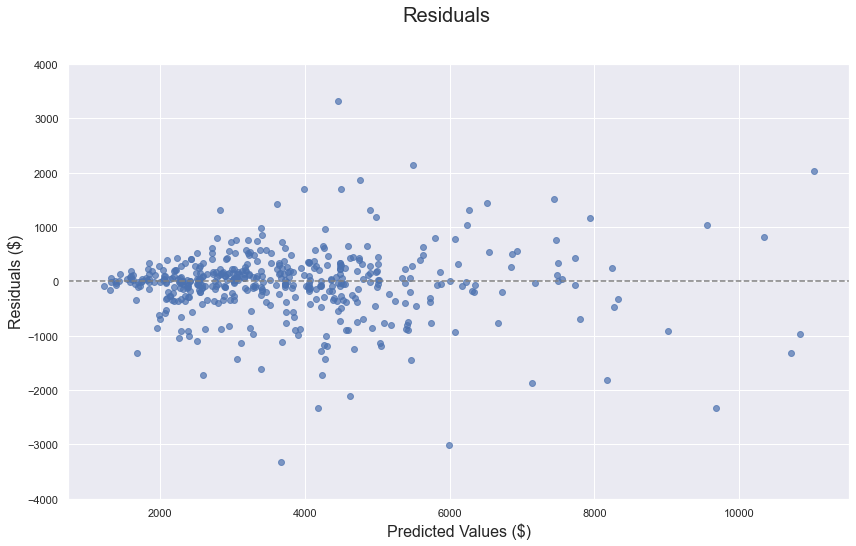

In [29]:
# Plot the residuals with respect to the predicted price

plt.figure(figsize=(14, 8))
plt.scatter((np.exp(xgb.predict(X_test))), (np.exp(xgb.predict(X_test)))-np.exp(y_test), alpha=.7)   

plt.axhline(0, linestyle='--', color='grey')
plt.suptitle('Residuals', fontsize=20, fontname='Arial')
plt.ylim(-4000, 4000)
plt.xlabel('Predicted Values ($)', fontsize=16, fontname='Arial')
plt.ylabel('Residuals ($)', fontsize=16, fontname='Arial')

## Evaluate the Feature Importances

In [30]:
# Extracting feature importances from the randomForest model
feature_importances = ({'Name':[],
                        'Score':[]})

for name, score in zip(X_train.columns, xgb.feature_importances_):
  feature_importances['Name'].append(name)
  feature_importances['Score'].append(score)

feature_importances = pd.DataFrame(feature_importances).sort_values(['Score'], ascending = False)

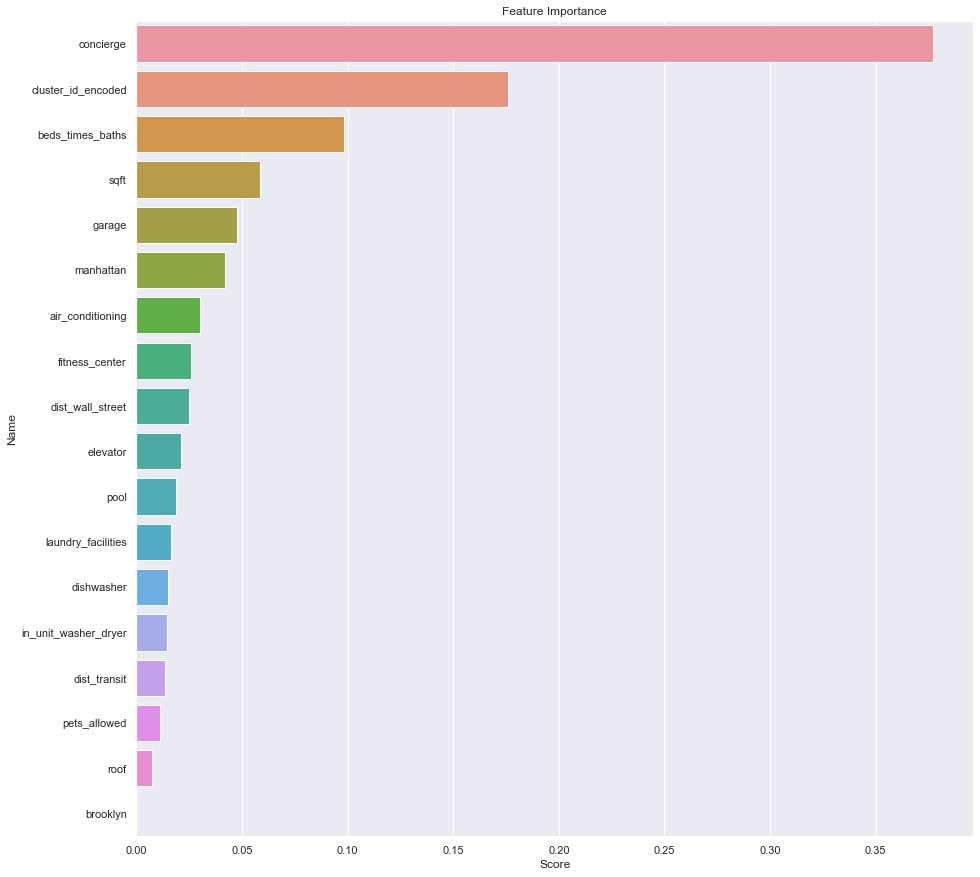

In [31]:
# Plot the feature importances
fig = plt.figure(figsize=(15,15))
sns.barplot(x = 'Score', y = 'Name', data = feature_importances)
plt.title('Feature Importance')
plt.show()

## Hyperparameter Tuning for XGBoost

In [32]:
params = {"n_estimators": np.arange(100,1000,250),
"learning_rate": np.arange(0.1,0.3,0.025),
 "max_depth": np.arange(3,10,1),
 "min_child_weight": np.arange(3,20,2),
 "reg_alpha": np.arange(0,1,0.1)}

In [33]:
regressor=XGBRegressor()

In [34]:
search = RandomizedSearchCV(regressor, param_distributions=params, cv=5)

In [35]:
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [36]:
best_params=search.best_params_
best_params

# best_params = {'reg_alpha': 0.4,
#  'n_estimators': 600,
#  'min_child_weight': 15,
#  'max_depth': 5,
#  'learning_rate': 0.19999999999999998}

{'reg_alpha': 0.1,
 'n_estimators': 100,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.175}

In [37]:
xgb=XGBRegressor(n_estimators = best_params['n_estimators'], 
                max_depth = best_params['max_depth'],
                learning_rate = best_params['learning_rate'],
                reg_alpha = best_params['reg_alpha']
                )

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.175, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# Training data
pred_train = xgb.predict(X_train)
r2_train = r2_score(np.exp(y_train), np.exp(pred_train))
mse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(pred_train)))

# Test data
pred_test = xgb.predict(X_test)
r2_test = r2_score(np.exp(y_test), np.exp(pred_test))
mse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(pred_test)))

# Print results
print('R squared training set', round(r2_train,2))
print('R squared test set', round(r2_test,2))
print('RMSE training set', round(mse_train, 2))
print('RMSE test set', round(mse_test, 2))

R squared training set 0.95
R squared test set 0.89
RMSE training set 358.97
RMSE test set 591.35


In [39]:
# Export the model for future use

with open('./models/new_york_city_rent_prediction.pickle', 'wb') as handle:
    pkl.dump(xgb, handle)

In [40]:
# Export the clustering for future use

with open('./models/new_york_city_cluster_kmeans.pickle', 'wb') as handle:
    pkl.dump(kmeans, handle)

In [41]:
# Export the cluster target encoding for future use

with open('./models/new_york_city_encoded_clusters.pickle', 'wb') as handle:
    pkl.dump(encoded_clusters, handle)

In [42]:
X_train.iloc[0,:].to_dict()

{'sqft': 7.090076835776092,
 'fitness_center': 0.0,
 'air_conditioning': 0.0,
 'in_unit_washer_dryer': 0.0,
 'laundry_facilities': 0.0,
 'roof': 0.0,
 'concierge': 0.0,
 'pool': 0.0,
 'elevator': 0.0,
 'garage': 0.0,
 'dishwasher': 0.0,
 'dist_transit': 0.1809981426382341,
 'dist_wall_street': 5.551186316149539,
 'pets_allowed': 0.0,
 'beds_times_baths': 3.0,
 'manhattan': 0.0,
 'brooklyn': 1.0,
 'cluster_id_encoded': 3.3362819146748905}

In [43]:
X_train.columns

Index(['sqft', 'fitness_center', 'air_conditioning', 'in_unit_washer_dryer',
       'laundry_facilities', 'roof', 'concierge', 'pool', 'elevator', 'garage',
       'dishwasher', 'dist_transit', 'dist_wall_street', 'pets_allowed',
       'beds_times_baths', 'manhattan', 'brooklyn', 'cluster_id_encoded'],
      dtype='object')